In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
#import pickle
import gc
import lightgbm as lgb
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Read in the dataset and replace the anomalous values
# app_train = pd.read_csv('/content/gdrive/MyDrive/home_credit/application_train.csv').replace({365243: np.nan})
# app_test = pd.read_csv('/content/gdrive/MyDrive/home_credit/application_test.csv').replace({365243: np.nan})
# bureau = pd.read_csv('/content/gdrive/MyDrive/home_credit/bureau.csv').replace({365243: np.nan})
# bureau_balance = pd.read_csv('/content/gdrive/MyDrive/home_credit/bureau_balance.csv').replace({365243: np.nan})
# cash = pd.read_csv('/content/gdrive/MyDrive/home_credit/POS_CASH_balance.csv').replace({365243: np.nan})
# credit = pd.read_csv('/content/gdrive/MyDrive/home_credit/credit_card_balance.csv').replace({365243: np.nan})
# previous = pd.read_csv('/content/gdrive/MyDrive/home_credit/previous_application.csv').replace({365243: np.nan})
# installments = pd.read_csv('/content/gdrive/MyDrive/home_credit/installments_payments.csv').replace({365243: np.nan})

In [ ]:
# dataset = Input.input_data('gdrive/MyDrive/home_credit/application_train.csv')
import pandas as pd
data_train = pd.read_csv('/content/gdrive/MyDrive/home_credit/application_train.csv')
data_prev = pd.read_csv('/content/gdrive/MyDrive/home_credit/previous_application.csv')

In [ ]:
data_merge = pd.merge(left=data_train,right=data_prev,how="inner",on="SK_ID_CURR")
# X = data_train.drop("TARGET", axis = 1)
# y = data_train[['TARGET']]
data_merge

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [ ]:
data_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_prev.sort_values(by=['SK_ID_CURR'])

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814647,1296007,456255,Cash loans,30737.655,765000.0,1067940.0,NaN,765000.0,FRIDAY,14,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
214743,1743609,456255,Consumer loans,11090.835,102037.5,112815.0,0.0,102037.5,THURSDAY,18,...,Furniture,12.0,middle,POS industry with interest,365243.0,-960.0,-630.0,-690.0,-687.0,0.0
1411592,2729207,456255,Consumer loans,11514.555,58225.5,58545.0,5823.0,58225.5,FRIDAY,18,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-469.0,-319.0,-409.0,-400.0,0.0
608510,2073384,456255,Cash loans,16400.610,229500.0,254340.0,NaN,229500.0,THURSDAY,12,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0


In [ ]:
df_no = data_train[data_train['TARGET'] == 0]
df_no

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df_yes =  data_train[data_train['TARGET'] == 1]
df_yes

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [ ]:
# df_balance_50 =
df_yes = df_yes.reset_index()
df_yes = df_yes.drop('index', axis = 1)

In [ ]:

df_yes_balance_50 = df_yes.loc[1:5000]
# df_yes

In [ ]:
df_yes_balance_50.to_csv('df_yes_balance_50.csv',index=False)

In [ ]:
# data NO
df_no = df_no.reset_index()
df_no = df_no.drop('index', axis = 1)
df_no

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282681,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
282682,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
282683,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
282684,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df_no_balance_50 = df_no.loc[1:5000]
df_no_balance_50.to_csv('df_no_balance_50.csv',index=False)
df_no_balance_50

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
5,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,106329,0,Cash loans,F,N,Y,0,144000.0,284256.0,29979.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4997,106330,0,Cash loans,M,N,N,1,112500.0,781920.0,28215.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4998,106331,0,Cash loans,M,Y,Y,0,202500.0,790830.0,62613.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4999,106332,0,Cash loans,M,Y,N,0,180000.0,180000.0,20308.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
dataset = pd.concat([df_no_balance_50,df_yes_balance_50])
dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
5,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,172107,1,Cash loans,F,N,N,0,225000.0,508495.5,26091.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4997,172112,1,Cash loans,F,N,Y,0,112500.0,540000.0,39424.5,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0
4998,172118,1,Cash loans,M,N,Y,0,135000.0,585000.0,29997.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4999,172135,1,Cash loans,M,Y,N,1,405000.0,640080.0,29970.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.to_csv('/content/gdrive/MyDrive/home_credit/new_dataset.csv', index=False)

In [ ]:
# from collections import Counter

from sklearn.model_selection import train_test_split

#Split dataset into train and test
data_train, data_test = train_test_split(dataset, test_size = 0.2)

In [ ]:
data_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1084,116255,1,Cash loans,M,Y,Y,0,157500.0,227520.0,16618.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4489,105689,0,Cash loans,F,N,Y,0,126000.0,199080.0,13432.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1873,102365,0,Revolving loans,F,Y,N,0,225000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3152,145297,1,Cash loans,M,N,Y,1,211500.0,808650.0,31333.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4212,160299,1,Cash loans,M,Y,N,2,378000.0,398016.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,106310,0,Cash loans,F,N,N,0,202500.0,337500.0,18450.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4151,105262,0,Revolving loans,F,Y,Y,0,225000.0,157500.0,7875.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
950,114365,1,Cash loans,F,N,Y,0,157500.0,545040.0,17536.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
1238,101568,0,Cash loans,F,N,N,0,112500.0,495000.0,17910.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
data_test

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2404,103033,0,Cash loans,M,Y,Y,0,225000.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,3.0
1198,117829,1,Cash loans,F,N,Y,0,315000.0,284400.0,22468.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3455,104375,0,Cash loans,F,Y,N,0,157500.0,1515415.5,40104.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2016,129413,1,Cash loans,F,N,Y,0,135000.0,521280.0,31630.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,7.0
1588,123422,1,Cash loans,M,Y,Y,0,90000.0,270000.0,19777.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,103330,0,Cash loans,M,N,Y,0,81000.0,490495.5,34884.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2706,138925,1,Cash loans,M,Y,Y,0,292500.0,971280.0,62203.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2846,103607,0,Cash loans,F,N,N,0,67500.0,781920.0,25969.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2099,102649,0,Cash loans,M,N,Y,0,135000.0,497520.0,33246.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
data_train.to_csv('/content/gdrive/MyDrive/home_credit/new_data_train.csv', index=False)
data_test.to_csv('/content/gdrive/MyDrive/home_credit/new_data_test.csv', index=False)

In [ ]:
# data_train.loc[0, 'NONLIVINGAPARTMENTS_MEDI']

0.0

In [ ]:
data_train.isnull().sum()

In [ ]:
data_train = data_train.dropna(axis=0)
data_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
269187,411950,0,Cash loans,M,Y,N,2,180000.0,158301.0,16924.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
128648,249223,0,Cash loans,M,Y,N,0,360000.0,359725.5,10903.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
227451,363461,0,Cash loans,M,Y,N,0,180000.0,148500.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
106398,223435,0,Cash loans,M,Y,Y,0,157500.0,468733.5,31455.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
91139,205841,0,Cash loans,F,Y,Y,0,112500.0,152820.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14579,117013,0,Cash loans,M,Y,Y,0,225000.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
9866,111481,0,Cash loans,M,Y,N,0,202500.0,1800000.0,49500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
96476,212001,0,Cash loans,F,Y,N,0,292500.0,1125000.0,32895.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
188965,319075,0,Cash loans,F,Y,Y,1,162000.0,675000.0,24930.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_train.isna().mean()

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 122, dtype: float64

In [ ]:
print(data_train.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [ ]:
data_train.isna().mean()

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [ ]:
y.value_counts()

TARGET
0         282686
1          24825
dtype: int64

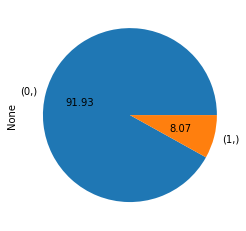

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

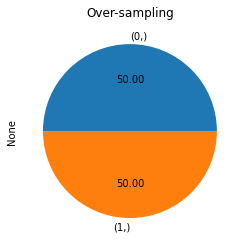

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
y_res.value_counts()

TARGET
0         282686
1         282686
dtype: int64

In [ ]:
data_train.to_csv('train.csv',index=False)

In [ ]:
train = Input.input_data('/content/train.csv')

In [ ]:
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y = train.pop('TARGET').values
X_train, X_temp, y_train, y_temp = train_test_split(data_train.drop(['SK_ID_CURR'],axis=1), y, stratify = y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (6021, 121)
Shape of X_val: (1290, 121)
Shape of X_test: (1291, 121)


In [ ]:
# Seperation of columns into numeric and categorical columns
# Pemisahan kolom yang numerik dan string
types = np.array([dt for dt in X_train.dtypes])
all_columns = X_train.columns.values
is_num = types != 'object'
num_cols = all_columns[is_num]
cat_cols = all_columns[~is_num]

In [ ]:
# Featurization of numeric data
imputer_num = SimpleImputer(strategy='median')
X_train_num = imputer_num.fit_transform(X_train[num_cols])
X_val_num = imputer_num.transform(X_val[num_cols])
X_test_num = imputer_num.transform(X_test[num_cols])
scaler_num = StandardScaler()
X_train_num1 = scaler_num.fit_transform(X_train_num)
X_val_num1 = scaler_num.transform(X_val_num)
X_test_num1 = scaler_num.transform(X_test_num)
X_train_num_final = pd.DataFrame(X_train_num1, columns=num_cols)
X_val_num_final = pd.DataFrame(X_val_num1, columns=num_cols)
X_test_num_final = pd.DataFrame(X_test_num1, columns=num_cols)

In [ ]:
# Featurization of categorical data
imputer_cat = SimpleImputer(strategy='constant', fill_value='MISSING')
X_train_cat = imputer_cat.fit_transform(X_train[cat_cols])
X_val_cat = imputer_cat.transform(X_val[cat_cols])
X_test_cat = imputer_cat.transform(X_test[cat_cols])
X_train_cat1= pd.DataFrame(X_train_cat, columns=cat_cols)
X_val_cat1= pd.DataFrame(X_val_cat, columns=cat_cols)
X_test_cat1= pd.DataFrame(X_test_cat, columns=cat_cols)
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_cat2 = ohe.fit_transform(X_train_cat1)
X_val_cat2 = ohe.transform(X_val_cat1)
X_test_cat2 = ohe.transform(X_test_cat1)
cat_cols_ohe = list(ohe.get_feature_names(input_features=cat_cols))
X_train_cat_final = pd.DataFrame(X_train_cat2, columns = cat_cols_ohe)
X_val_cat_final = pd.DataFrame(X_val_cat2, columns = cat_cols_ohe)
X_test_cat_final = pd.DataFrame(X_test_cat2, columns = cat_cols_ohe)

In [ ]:
# Final complete data
X_train_final = pd.concat([X_train_num_final,X_train_cat_final], axis = 1)
X_val_final = pd.concat([X_val_num_final,X_val_cat_final], axis = 1)
X_test_final = pd.concat([X_test_num_final,X_test_cat_final], axis = 1)
print(X_train_final.shape)
print(X_val_final.shape)
print(X_test_final.shape)

(6021, 233)
(1290, 233)
(1291, 233)


Saving files to output for future reference:

In [ ]:
# Saving the Dataframes into CSV files for future use
X_train_final.to_csv('X_train_final.csv',index=False)
X_val_final.to_csv('X_val_final.csv',index=False)
X_test_final.to_csv('X_test_final.csv',index=False)

**Selection of features using LightGBM**

In [ ]:
model_sk = lgb.LGBMClassifier(boosting_type='gbdt', max_depth=7, learning_rate=0.01, n_estimators= 2000, 
                 class_weight='balanced', subsample=0.9, colsample_bytree= 0.8, n_jobs=-1)
X_train_final=X_train_final.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
train_features, valid_features, train_y, valid_y = train_test_split(X_train_final, y_train, test_size = 0.15, random_state = 42)
model_sk.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], eval_metric = 'auc', verbose = 200)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.683197


LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.01, max_depth=7, n_estimators=2000,
               subsample=0.9)

**Machine Learning Model : Random Forest with selected features**

In [ ]:
alpha = [200,500,1000,2000]
max_depth = [7, 10]
cv_auc_score = []
for i in alpha:
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j,class_weight='balanced',
                                     random_state=42, n_jobs=-1)
        clf.fit(X_train_final[selected_features_diff], y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train_final[selected_features_diff], y_train)
        y_pred_prob = sig_clf.predict_proba(X_val_final[selected_features_diff])[:,1]
        cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
        print('For n_estimators {0}, max_depth {1} cross validation AUC score {2}'.
              format(i,j,roc_auc_score(y_val,y_pred_prob)))

ValueError: ignored

The optimal values are: n_estimators 500, max_depth 7 
For best n_estimators 500 best max_depth 7, The Train AUC score is 0.9669187772556318
For best n_estimators 500 best max_depth 7, The Validation AUC score is 0.7046169605619375
For best n_estimators 500 best max_depth 7, The Test AUC score is 0.7244537744913732
The test AUC score is : 0.7244537744913732
The percentage of misclassified points 06.12% :


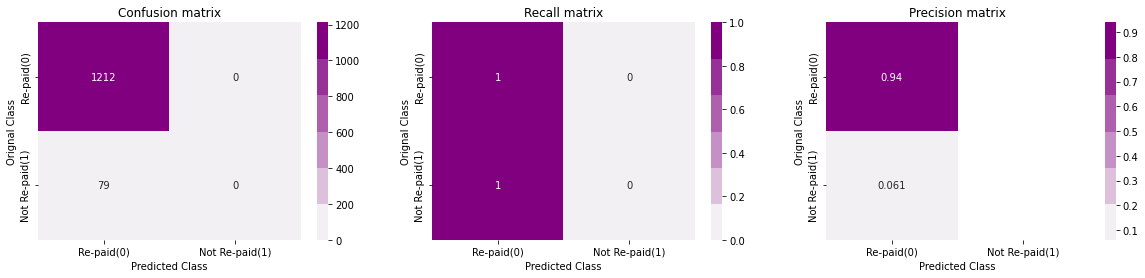

In [ ]:
best_alpha = np.argmax(cv_auc_score)
print('The optimal values are: n_estimators {0}, max_depth {1} '.format(alpha[int(best_alpha/2)],
                                                                        max_depth[int(best_alpha%2)]))
rf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)],
                            class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_final[selected_features_diff], y_train)
rf_sig_clf = CalibratedClassifierCV(rf, method="sigmoid")
rf_sig_clf.fit(X_train_final[selected_features_diff], y_train)
y_pred_prob = rf_sig_clf.predict_proba(X_train_final[selected_features_diff])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Train AUC score is {2}'.format(alpha[int(best_alpha/2)], 
                                                    max_depth[int(best_alpha%2)],roc_auc_score(y_train,y_pred_prob)))
y_pred_prob = rf_sig_clf.predict_proba(X_val_final[selected_features_diff])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Validation AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                            max_depth[int(best_alpha%2)],roc_auc_score(y_val,y_pred_prob)))
y_pred_prob = rf_sig_clf.predict_proba(X_test_final[selected_features_diff])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Test AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                        max_depth[int(best_alpha%2)],roc_auc_score(y_test,y_pred_prob)))
y_pred = rf_sig_clf.predict(X_test_final[selected_features_diff])
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
#PICKLE
#import pickle

#with open('model_pickle', 'wb') as r:
 # pickle.dump(clf, r)

The optimal values are: n_estimators 1000, max_depth 10 
For best n_estimators 1000 best max_depth 10, The Train AUC score is 0.8434212088781006
For best n_estimators 1000 best max_depth 10, The Validation AUC score is 0.7500785580170302
For best n_estimators 1000 best max_depth 10, The Test AUC score is 0.7483586282337755
The test AUC score is : 0.7483586282337755
The percentage of misclassified points 08.08% :


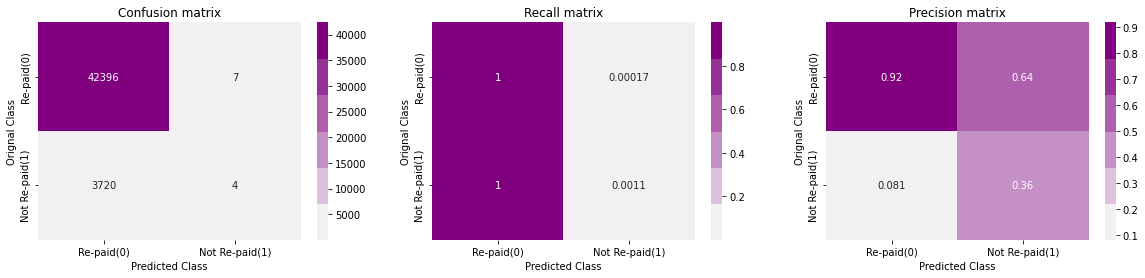

In [ ]:
best_alpha = np.argmax(cv_auc_score)
print('The optimal values are: n_estimators {0}, max_depth {1} '.format(alpha[int(best_alpha/2)],
                                                                        max_depth[int(best_alpha%2)]))
rf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)],
                            class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_final[selected_features_diff], y_train)
rf_sig_clf = CalibratedClassifierCV(rf, method="sigmoid")
rf_sig_clf.fit(X_train_final[selected_features_diff], y_train)
y_pred_prob = rf_sig_clf.predict_proba(X_train_final[selected_features_diff])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Train AUC score is {2}'.format(alpha[int(best_alpha/2)], 
                                                    max_depth[int(best_alpha%2)],roc_auc_score(y_train,y_pred_prob)))
y_pred_prob = rf_sig_clf.predict_proba(X_val_final[selected_features_diff])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Validation AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                            max_depth[int(best_alpha%2)],roc_auc_score(y_val,y_pred_prob)))
y_pred_prob = rf_sig_clf.predict_proba(X_test_final[selected_features_diff])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Test AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                        max_depth[int(best_alpha%2)],roc_auc_score(y_test,y_pred_prob)))
y_pred = rf_sig_clf.predict(X_test_final[selected_features_diff])
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

**Summary of EDA**

The initial exploratory data analysis helped in identifying a lot of interprative information as summerized below:

1. The initial dataset had 122 features/attributes
2. For the top 20 columns the missing data was more than 50% that was handled by imputation.
3. The TARGET variable which indicated if the applicant repayed loan or not was highly skewed in the train data with 91.9% of the data of repayed applicants. (This imbalance was handled in the data preparation phase)
4. Distribution charts pointed towards below:
  *   Applicants with high income(>1000000) are likely to repay the loan.
  *   Majority of the applicants (90.5%) preferred taking cash loans.
  *   Applicants who are taking credit for large amount are more likely to repay loan
  *   Amongst the pool of applicants 100% of students and businessmen repayed loan
  *   People with academic degrees are more likely to repay loan
  *   Applicants with less than 2 years of employment are less likely to repay loan









**Summary of Feature Engineering**

The feature importance plot at the end of feature engineering displays the top 20 features having most impact on the target variable

FINAL RESULT

Random Forest with selected features

train AUC = 0,76

val AUC = 0,75

test AUC = 0,759